In [54]:
import openturns as ot
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

random_state = 123
np.random.seed(random_state)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [236]:
from depimpact.tests.test_functions import func_sum, func_cum_sum_weight

dim = 3
margins = []
for i in range(dim):
    margins.append(ot.Uniform(0, 1.))
    
margins[0] = ot.Uniform(0, 1.)
margins = [ot.Normal()]*dim
alpha = 0.1
q_func = quantile_func(alpha)
families = np.tril(np.ones((dim, dim)), k=1)
from depimpact import ConservativeEstimate, quantile_func

In [239]:
n_influencial_pairs = 2
val_influencial = 1.
val_non_influencial = 0.0
corr_dim = int(dim * (dim-1)/2)

all_pairs = np.asarray(list(itertools.combinations(range(dim), 2)))
selected_pairs = all_pairs[np.random.choice(range(corr_dim), size=n_influencial_pairs, replace=False)]
selected_pairs = np.asarray([[0, dim-2], [1, dim-1]])
selected_pairs = np.asarray([[0, dim-2]])
selected_pairs = np.asarray([[0, dim-3], [1, dim-1], [0, dim-1]])
selected_pairs = np.asarray([[0, dim-2]])

# selected_pairs = all_pairs

power = np.zeros((dim, dim))
for i in range(1, dim):
    for j in range(i):
        if [j, i] in selected_pairs.tolist():
            print([i, j])
            power[i, j] = val_influencial
        else:
            power[i, j] = val_non_influencial
test_func = lambda x: func_cum_sum_weight(x, power, use_sum=False)
print(power)

[1, 0]
[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]


### For the standard vine

In [241]:
K = 200
grid_type = 'vertices'
n = 10000
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)
grid_results_lhs = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result = grid_results_lhs.min_result
min_result.quantity

-2.6023551216503114

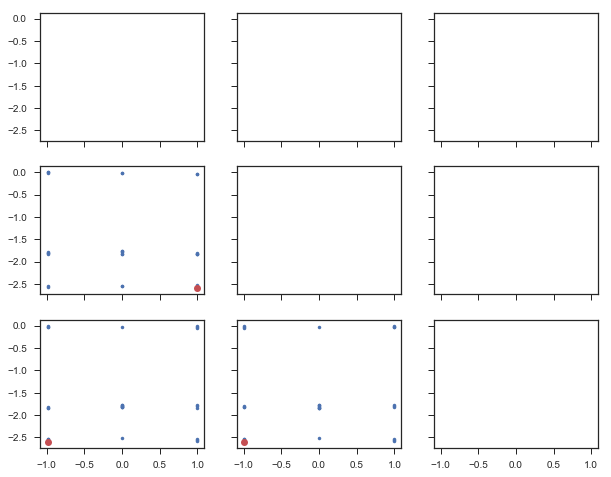

In [242]:
fig, axes = plt.subplots(dim, dim, figsize=(10, 8), sharex=True, sharey=True)
kendalls = grid_results_lhs.kendalls
quantities = grid_results_lhs.quantities
k = 0
for i in range(1, dim):
    for j in range(i):
        ax = axes[i, j]
        ax.plot(kendalls[:, k], quantities, '.')
        ax.plot(min_result.kendall_tau[k], min_result.quantity, 'ro')
        k += 1

In [243]:
quant_estimate.vine_structure

array([[1, 0, 0],
       [2, 2, 0],
       [3, 3, 3]])

In [244]:
quant_estimate.vine_structure = np.asarray([[1, 0, 0, 0],
                                            [3, 2, 0, 0],
                                            [4, 3, 3, 0],
                                            [2, 4, 4, 4]])

quant_estimate.vine_structure = np.asarray([[1, 0, 0],
                                            [3, 2, 0],
                                            [2, 3, 3]])
grid_results_lhs = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result = grid_results_lhs.min_result
min_result.quantity

-2.638056706476647

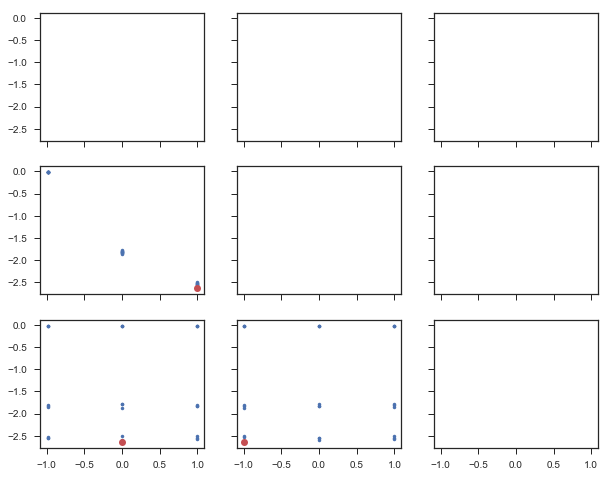

In [245]:
fig, axes = plt.subplots(dim, dim, figsize=(10, 8), sharex=True, sharey=True)
kendalls = grid_results_lhs.kendalls
quantities = grid_results_lhs.quantities
k = 0
for i in range(1, dim):
    for j in range(i):
        ax = axes[i, j]
        ax.plot(kendalls[:, k], quantities, '.')
        ax.plot(min_result.kendall_tau[k], min_result.quantity, 'ro')
        k += 1

In [233]:
quant_estimate.vine_structure = np.asarray([[1, 0, 0, 0],
                                            [4, 2, 0, 0],
                                            [3, 4, 3, 0],
                                            [2, 3, 4, 4]])
grid_results_lhs = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result = grid_results_lhs.min_result
min_result.quantity

-7.830926450066358

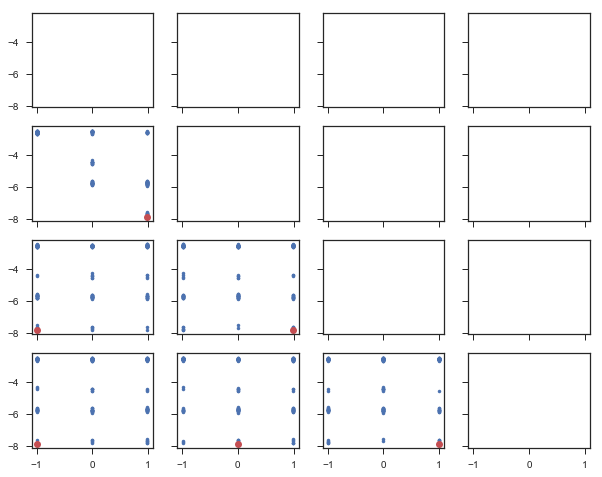

In [234]:
fig, axes = plt.subplots(dim, dim, figsize=(10, 8), sharex=True, sharey=True)
kendalls = grid_results_lhs.kendalls
quantities = grid_results_lhs.quantities
k = 0
for i in range(1, dim):
    for j in range(i):
        ax = axes[i, j]
        ax.plot(kendalls[:, k], quantities, '.')
        ax.plot(min_result.kendall_tau[k], min_result.quantity, 'ro')
        k += 1

In [252]:
param = [-0.99, 0, 0]
result = quant_estimate.stochastic_function(param, n, return_input_sample=False)
res_quant = np.percentile(result, alpha*100)

In [ ]:
grid_results_lhs = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, q_func=q_func)
min_result = grid_results_lhs.min_result
min_result.quantity